In [1]:
from trainingsettest import UniformCannonTester, spec_stats
import matplotlib.pyplot as plt

In [2]:
filepath = "sfh_2500_10_20250918_102236"

model_10 = UniformCannonTester(filepath, 10)
model_50 = UniformCannonTester(filepath, 50)
model_100 = UniformCannonTester(filepath, 100)
model_250 = UniformCannonTester(filepath, 250)
model_500 = UniformCannonTester(filepath, 500)

models = [model_10, model_50, model_100, model_250, model_500]

Text(0.5, 0, 'Training Set Size')

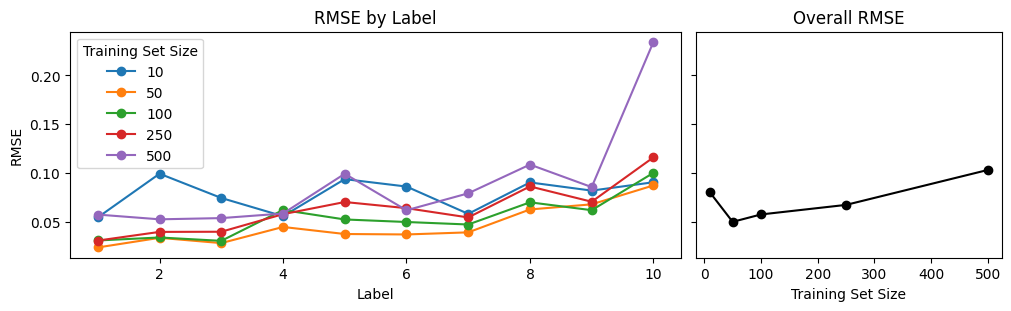

In [3]:
# comparing different size training set

fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True, constrained_layout=True, gridspec_kw={'width_ratios': [2, 1]})

overall = []
for m in models:
    df = m.rmse()
    rmses = df['RMSE'][:-1]
    overall.append(df['RMSE'].iloc[-1])
    labels = df['Label'][:-1]

    ax[0].plot(labels, rmses, marker='o')

ax[1].plot([10, 50, 100, 250, 500], overall, 'k', marker='o')
ax[0].legend(['10', '50', '100', '250', '500'], title='Training Set Size')
ax[0].set_title("RMSE by Label")
ax[1].set_title("Overall RMSE")
ax[0].set_ylabel("RMSE")
ax[0].set_xlabel("Label")
ax[1].set_xlabel("Training Set Size")

Text(0, 0.5, 'p-value')

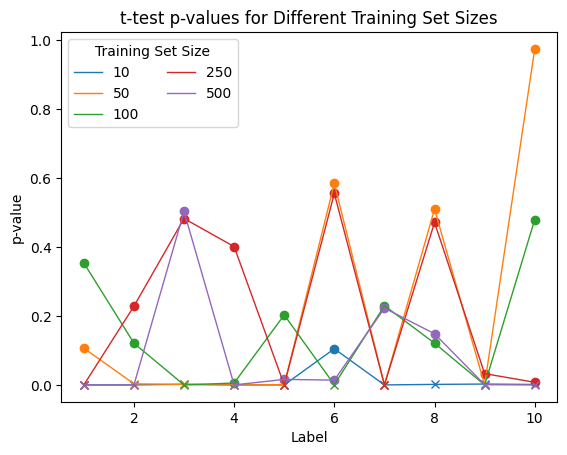

In [4]:
labels = range(1,11)
model_labels = ['10','50', '100', '250', '500']
line_handles = []

for idx, m in enumerate(models):
    df = m.t_test()
    res = df['P-values']

    color = f'C{idx}'

    # Plot lines for Restricted and Unrestricted, save handles for legend
    line_res, = plt.plot(labels, res, color=color, linewidth=1, zorder=2, label=model_labels[idx])
    line_handles.append(line_res)

    # Overlay points with open/closed circles for Restricted
    for i, y in enumerate(res):
        markerstyle = 'o' if y>=0.005 else 'x'
        plt.plot(labels[i], y, marker=markerstyle, linestyle='None', color=color, zorder=1)

# Legend for line colors (training set size)
plt.legend(handles=line_handles, labels=model_labels, title='Training Set Size', loc='upper left', ncols=2)
plt.title("t-test p-values for Different Training Set Sizes")
plt.xlabel("Label")
plt.ylabel("p-value")

Text(0, 0.5, 'p-value')

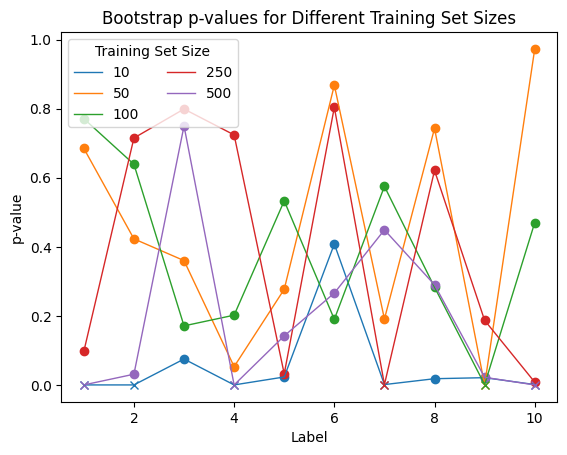

In [5]:
for idx, m in enumerate(models):
    df = m.bootstrap()
    res = df['P-values']

    color = f'C{idx}'

    # Plot lines for Restricted and Unrestricted, save handles for legend
    line_res, = plt.plot(labels, res, color=color, linewidth=1, zorder=2, label=model_labels[idx])

    # Overlay points with open/closed circles for Restricted
    for i, y in enumerate(res):
        markerstyle = 'o' if y>=0.005 else 'x'
        plt.plot(labels[i], y, marker=markerstyle, linestyle='None', color=color, zorder=1)

# Legend for line colors (training set size)
plt.legend(handles=line_handles, labels=model_labels, title='Training Set Size', loc='upper left', ncols=2)
plt.title("Bootstrap p-values for Different Training Set Sizes")
plt.xlabel("Label")
plt.ylabel("p-value")

In [6]:
model1 = spec_stats(filepath, 100, 10)
model2 = spec_stats(filepath, 100, 100)
model3 = spec_stats(filepath, 100, 200)
model4 = spec_stats(filepath, 100, 350)
model5 = spec_stats(filepath, 100, 490)

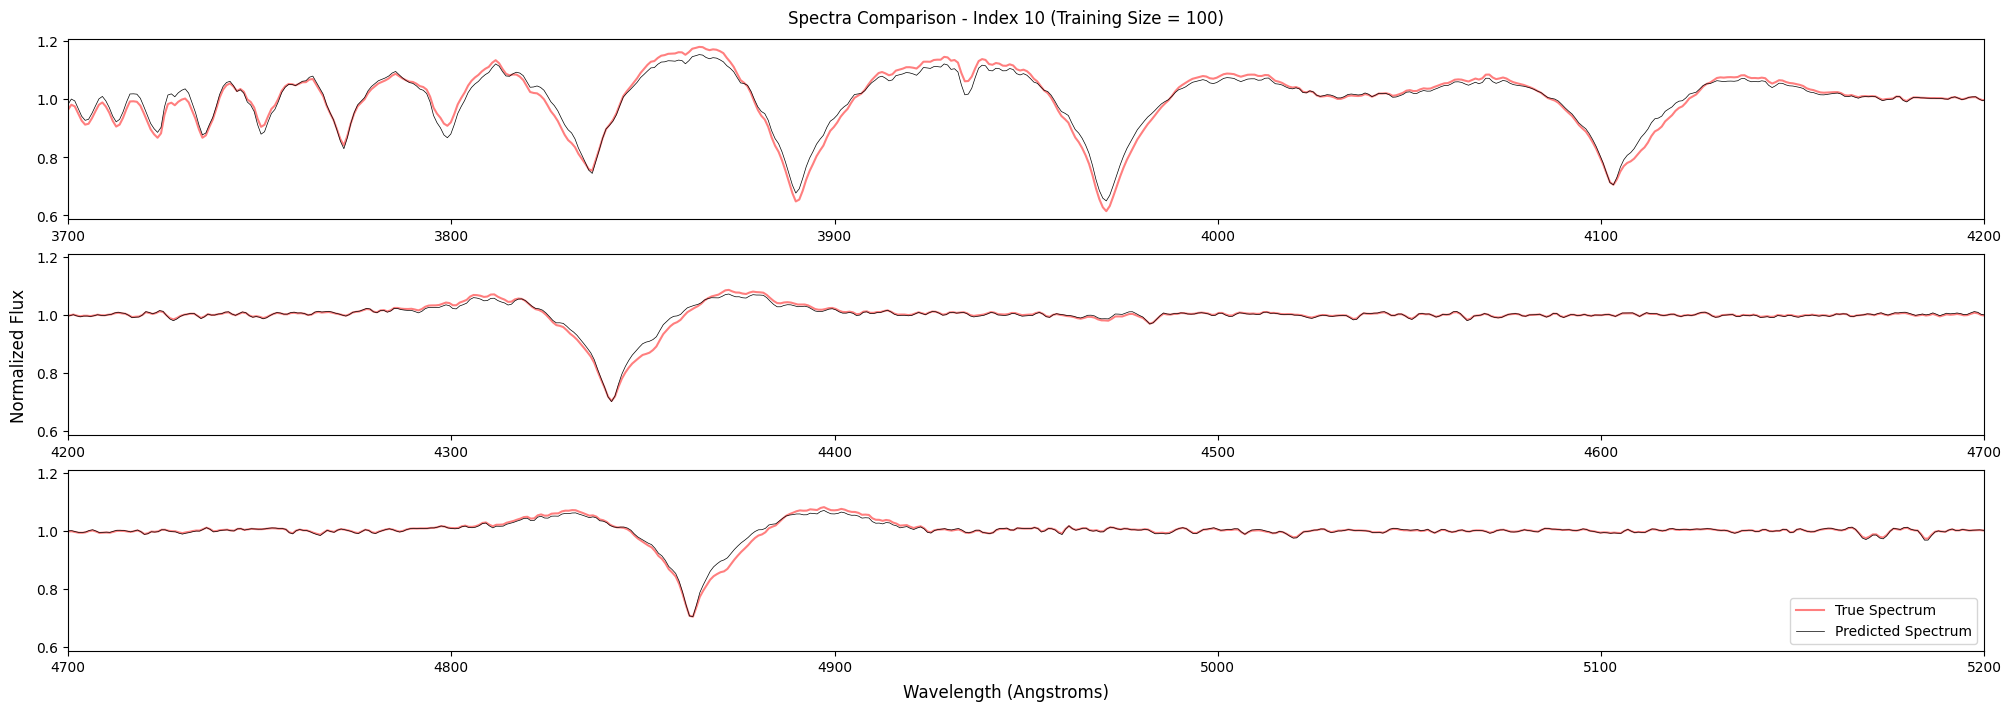

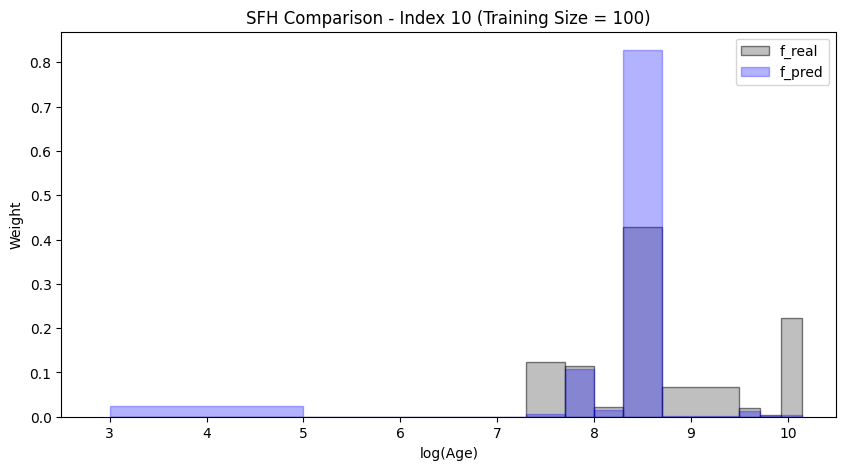

In [7]:
model1.plot_spectra()
model1.plot_sfh()

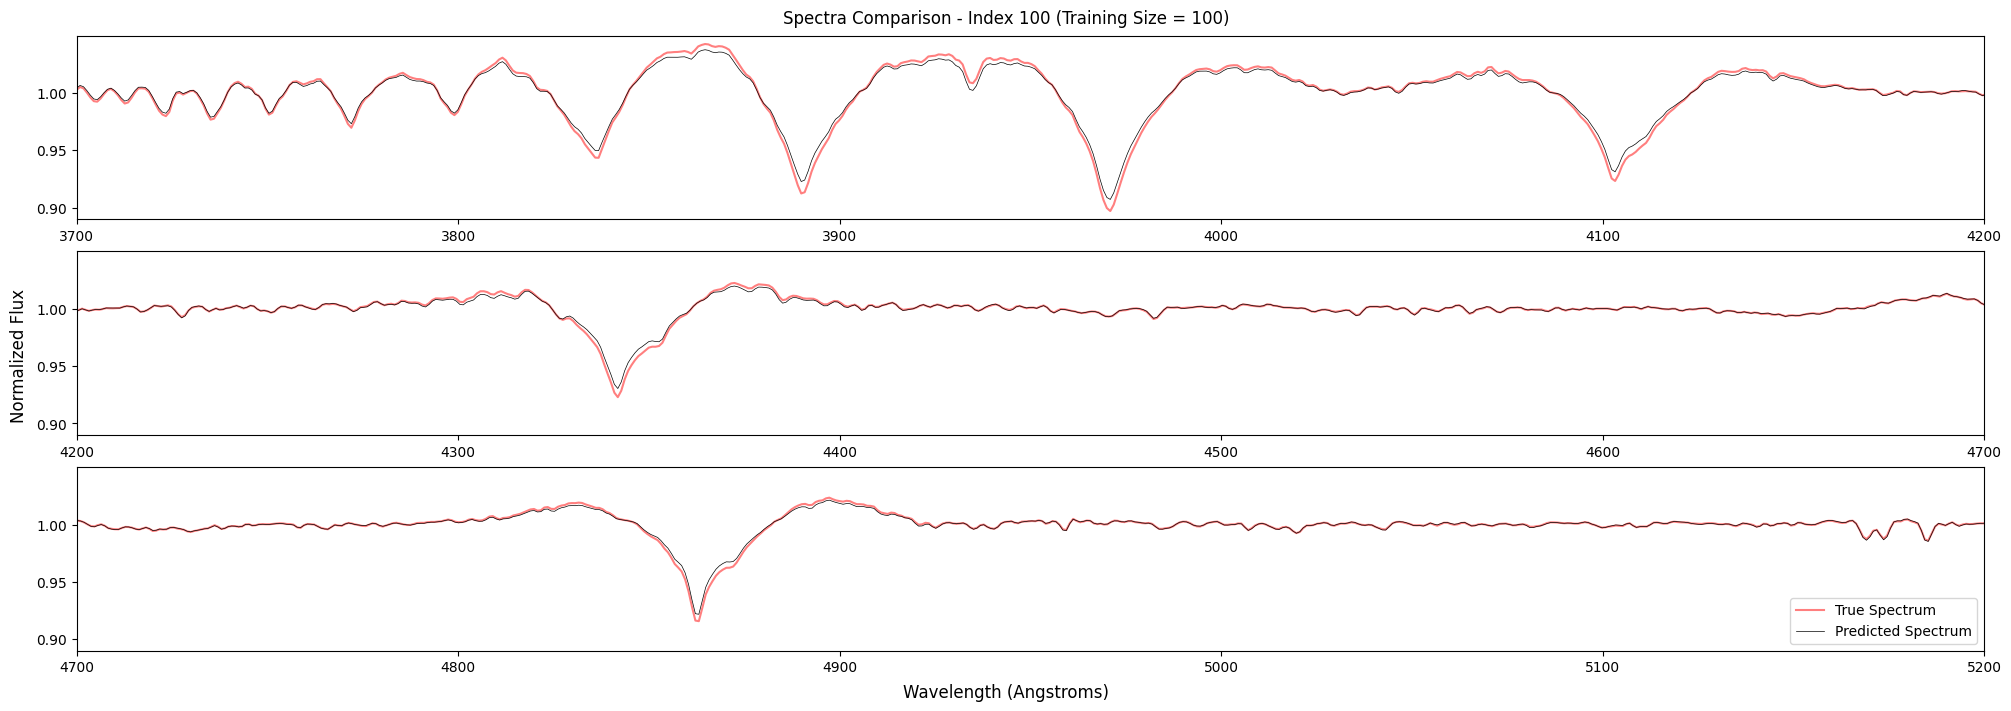

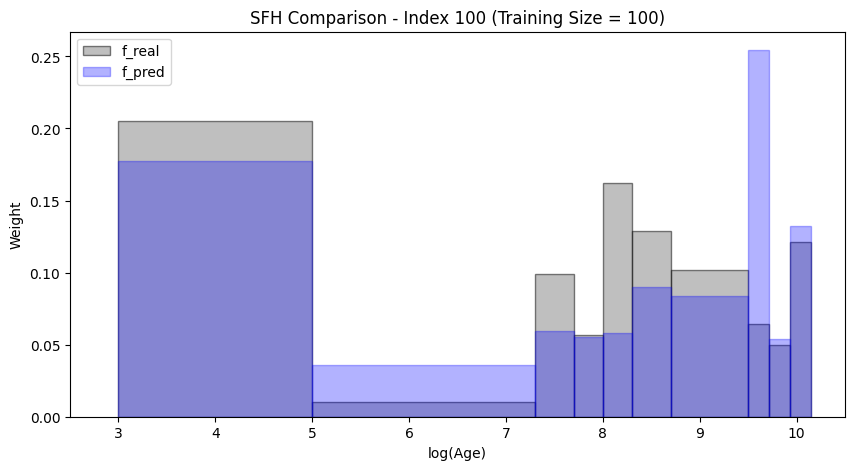

In [8]:
model2.plot_spectra()
model2.plot_sfh()

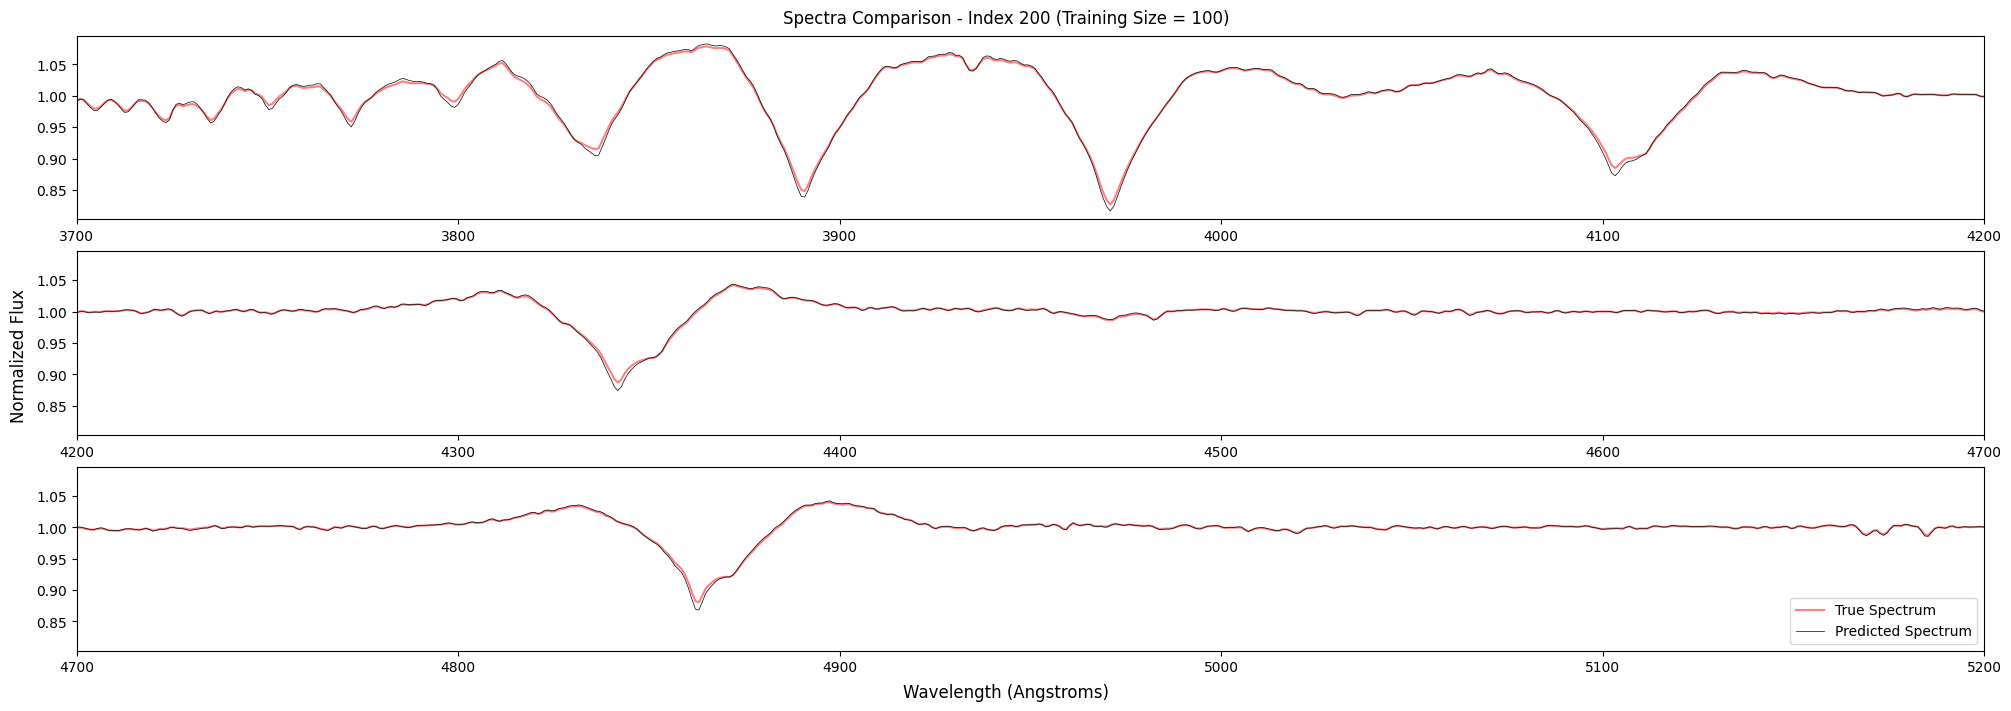

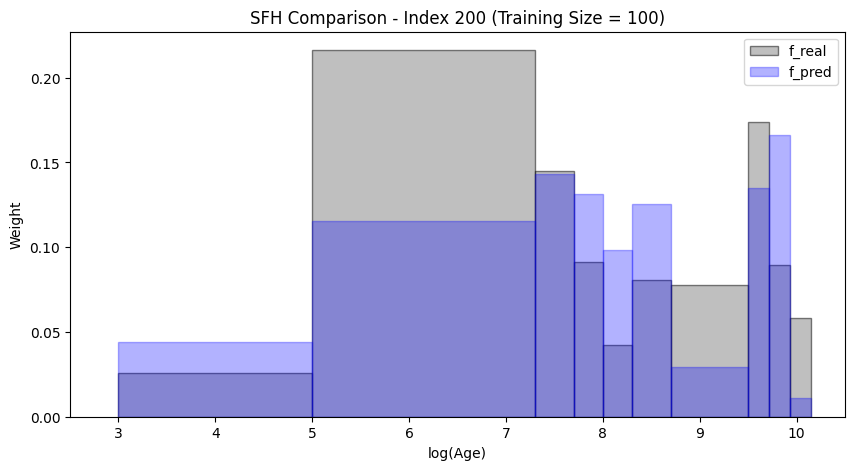

In [9]:
model3.plot_spectra()
model3.plot_sfh()

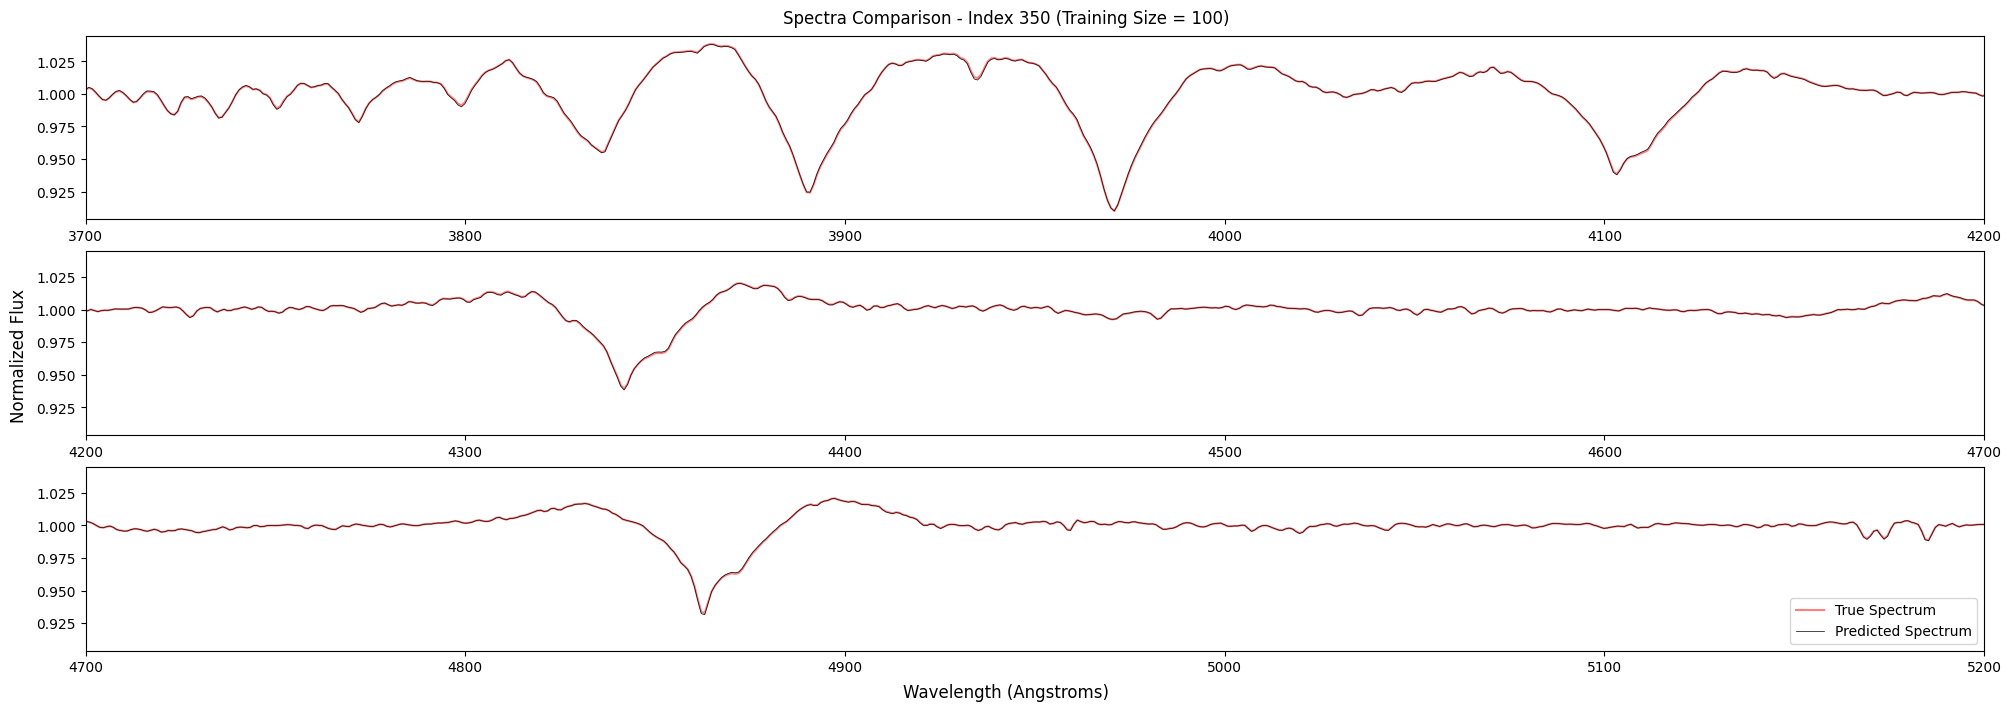

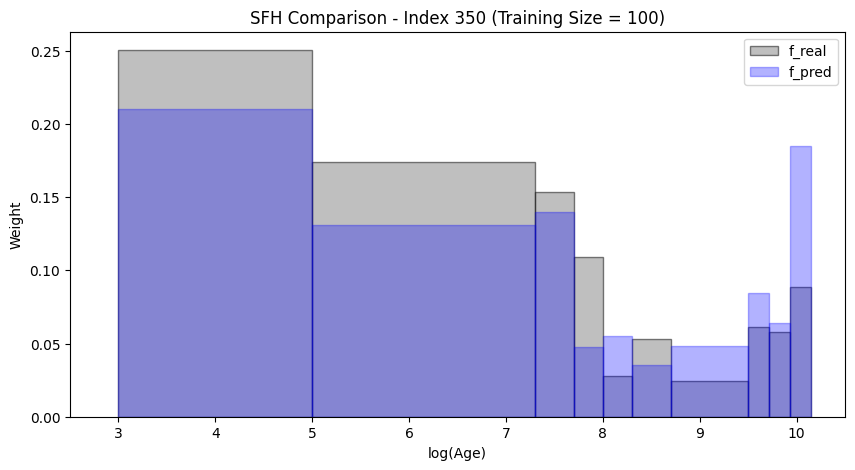

In [10]:
model4.plot_spectra()
model4.plot_sfh()

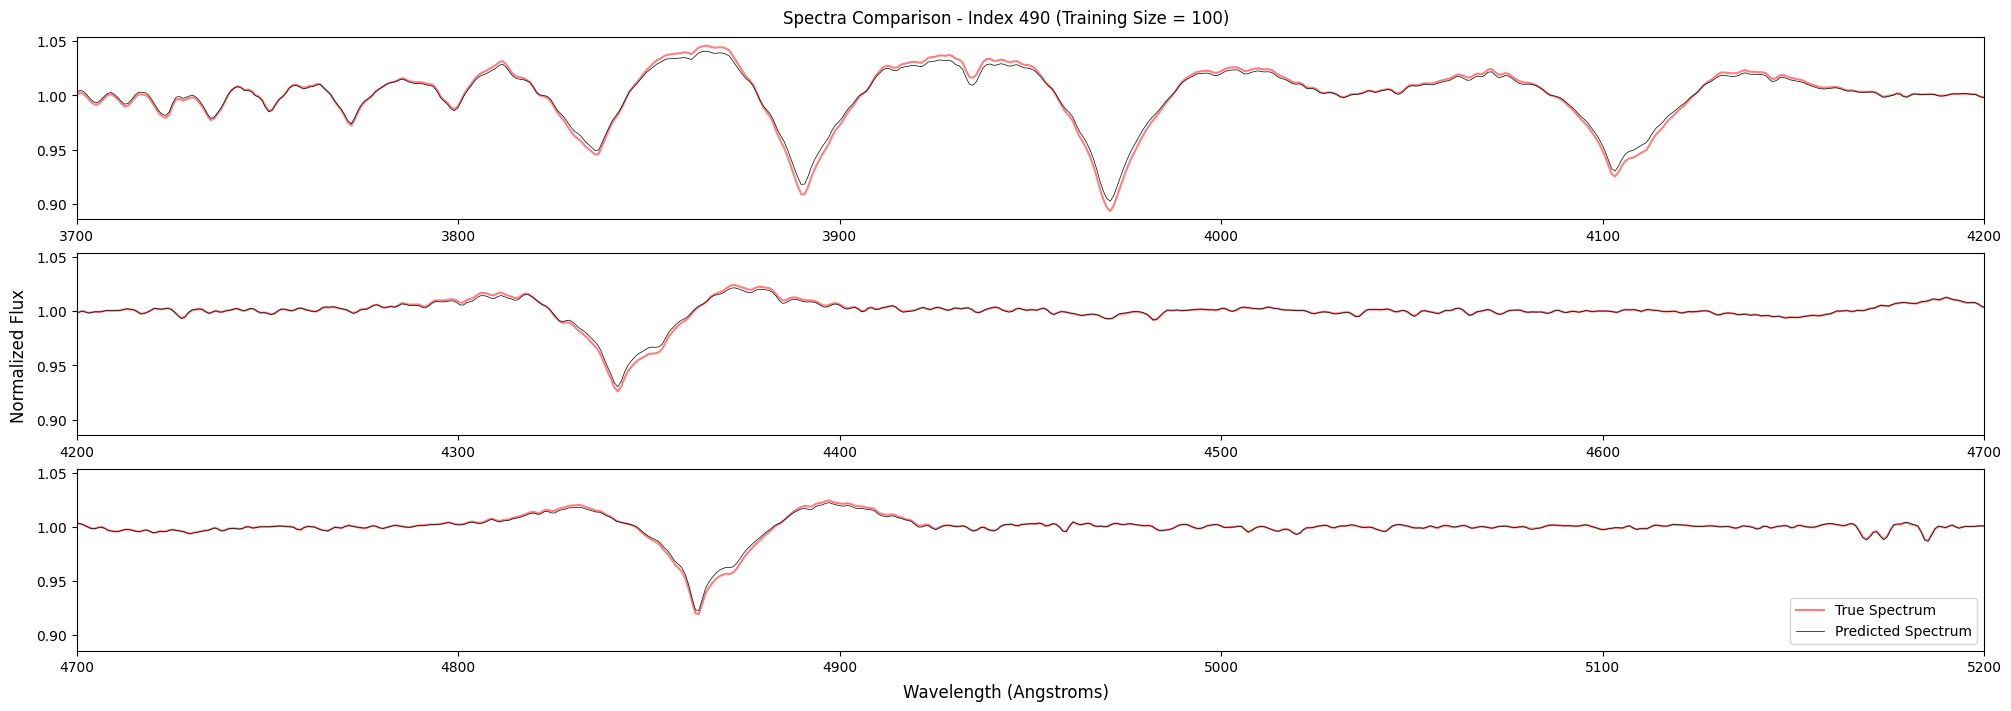

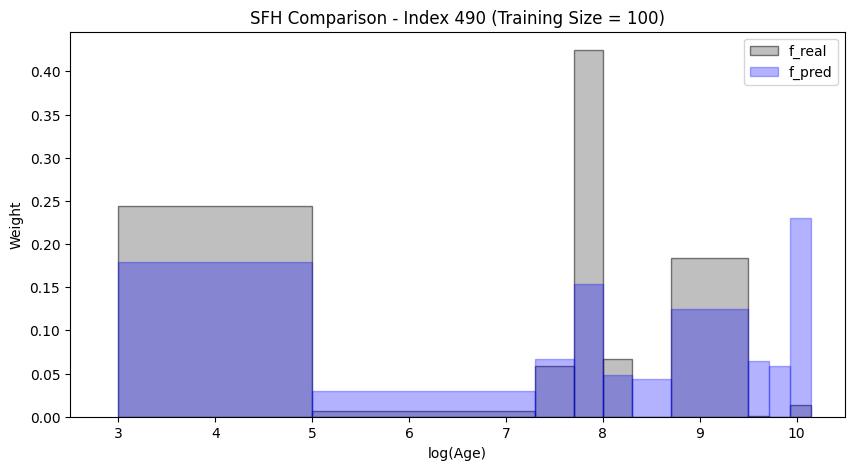

In [11]:
model5.plot_spectra()
model5.plot_sfh()

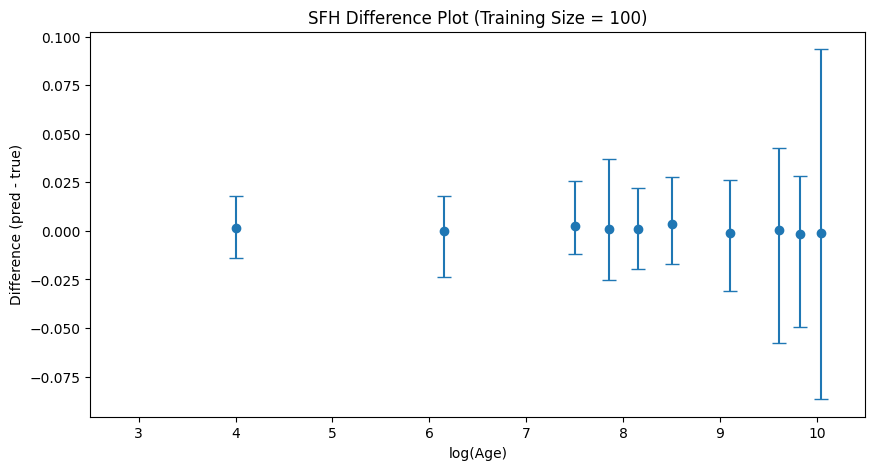

In [12]:
model_100.plot_difference()